In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


In [2]:
#mapa logistico del ejercicio
def logistic_map(x):
    return 4*x*(1-x)

In [3]:
def randomize(x,y):
    #x matriz de imagenes (imagenes x dimension)
    #y matriz de scores verdaderos (imagenes x categorias)
    indices = np.random.choice(x.shape[0], x.shape[0], replace=False)
    x = x[indices]
    y = y[indices]
    return x,y

In [4]:
#funcion que genera los datos
#n_datos es el numero de datos
def generate_data(n_datos):
    x= np.random.uniform(0,1,n_datos)
    y = logistic_map(x)
    return x,y

In [5]:
#genero los datos
n_datos = 100000
x_total,y_total = generate_data(n_datos)
#hago shuffle de los datos
x_total, y_total = randomize(x_total,y_total)
#separo en datos de train y test 
x_train = x_total[:75000]
y_train = y_total[:75000]
x_test = x_total[75000:]
y_test = y_total[75000:]
#algunos parametros de la red
n_dim = 1
n_capa1 = 5
n_capa2 = 1
epocas = 200
lr = 1e-1
rg = 1e-4

In [6]:
#armo la red neuronal
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1,kernel_regularizer=keras.regularizers.l2(rg),use_bias=True,
                        activation='tanh')(x)
l2 = keras.layers.Concatenate()([l1,x])
l3 = keras.layers.Dense(units=n_capa2,kernel_regularizer=keras.regularizers.l2(rg),use_bias=True,
                        activation='linear')(l2)
model = keras.Model(inputs=x, outputs=l3)
optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer, loss=keras.losses.MSE,metrics=['mse'])
history = model.fit(x_train, y_train, epochs=epocas, validation_data=(x_test, y_test),batch_size=100, verbose=2)
#plot_model(model,to_file='ej5_cg.pdf',show_shapes = True,rankdir='LR')

Train on 75000 samples, validate on 25000 samples
Epoch 1/200
 - 2s - loss: 0.0742 - mse: 0.0739 - val_loss: 0.0409 - val_mse: 0.0402
Epoch 2/200
 - 1s - loss: 0.0118 - mse: 0.0106 - val_loss: 0.0035 - val_mse: 0.0019
Epoch 3/200
 - 1s - loss: 0.0031 - mse: 0.0015 - val_loss: 0.0029 - val_mse: 0.0013
Epoch 4/200
 - 1s - loss: 0.0028 - mse: 0.0012 - val_loss: 0.0028 - val_mse: 0.0012
Epoch 5/200
 - 2s - loss: 0.0027 - mse: 0.0011 - val_loss: 0.0027 - val_mse: 0.0011
Epoch 6/200
 - 2s - loss: 0.0027 - mse: 0.0011 - val_loss: 0.0026 - val_mse: 0.0011
Epoch 7/200
 - 1s - loss: 0.0026 - mse: 0.0010 - val_loss: 0.0026 - val_mse: 0.0010
Epoch 8/200
 - 1s - loss: 0.0026 - mse: 9.8726e-04 - val_loss: 0.0026 - val_mse: 9.8385e-04
Epoch 9/200
 - 1s - loss: 0.0025 - mse: 9.4559e-04 - val_loss: 0.0025 - val_mse: 9.2695e-04
Epoch 10/200
 - 1s - loss: 0.0025 - mse: 9.0733e-04 - val_loss: 0.0025 - val_mse: 8.8892e-04
Epoch 11/200
 - 1s - loss: 0.0025 - mse: 8.7435e-04 - val_loss: 0.0024 - val_mse: 8.6

Epoch 90/200
 - 2s - loss: 0.0018 - mse: 2.2574e-04 - val_loss: 0.0018 - val_mse: 2.2356e-04
Epoch 91/200
 - 2s - loss: 0.0018 - mse: 2.2319e-04 - val_loss: 0.0018 - val_mse: 2.3230e-04
Epoch 92/200
 - 2s - loss: 0.0018 - mse: 2.2171e-04 - val_loss: 0.0017 - val_mse: 2.1983e-04
Epoch 93/200
 - 2s - loss: 0.0017 - mse: 2.1943e-04 - val_loss: 0.0018 - val_mse: 2.2080e-04
Epoch 94/200
 - 2s - loss: 0.0017 - mse: 2.1705e-04 - val_loss: 0.0017 - val_mse: 2.1585e-04
Epoch 95/200
 - 2s - loss: 0.0017 - mse: 2.1520e-04 - val_loss: 0.0017 - val_mse: 2.1422e-04
Epoch 96/200
 - 2s - loss: 0.0017 - mse: 2.1382e-04 - val_loss: 0.0017 - val_mse: 2.1300e-04
Epoch 97/200
 - 2s - loss: 0.0017 - mse: 2.1133e-04 - val_loss: 0.0017 - val_mse: 2.1103e-04
Epoch 98/200
 - 2s - loss: 0.0017 - mse: 2.0980e-04 - val_loss: 0.0017 - val_mse: 2.0945e-04
Epoch 99/200
 - 2s - loss: 0.0017 - mse: 2.0815e-04 - val_loss: 0.0017 - val_mse: 2.0940e-04
Epoch 100/200
 - 2s - loss: 0.0017 - mse: 2.0602e-04 - val_loss: 0.001

Epoch 178/200
 - 2s - loss: 0.0017 - mse: 1.3334e-04 - val_loss: 0.0017 - val_mse: 1.4251e-04
Epoch 179/200
 - 2s - loss: 0.0017 - mse: 1.3250e-04 - val_loss: 0.0017 - val_mse: 1.3453e-04
Epoch 180/200
 - 2s - loss: 0.0017 - mse: 1.3220e-04 - val_loss: 0.0017 - val_mse: 1.3183e-04
Epoch 181/200
 - 2s - loss: 0.0017 - mse: 1.3161e-04 - val_loss: 0.0017 - val_mse: 1.3346e-04
Epoch 182/200
 - 2s - loss: 0.0017 - mse: 1.3110e-04 - val_loss: 0.0017 - val_mse: 1.3106e-04
Epoch 183/200
 - 2s - loss: 0.0017 - mse: 1.3099e-04 - val_loss: 0.0017 - val_mse: 1.2997e-04
Epoch 184/200
 - 2s - loss: 0.0017 - mse: 1.3024e-04 - val_loss: 0.0017 - val_mse: 1.3146e-04
Epoch 185/200
 - 2s - loss: 0.0017 - mse: 1.2997e-04 - val_loss: 0.0017 - val_mse: 1.3144e-04
Epoch 186/200
 - 2s - loss: 0.0016 - mse: 1.2962e-04 - val_loss: 0.0017 - val_mse: 1.3088e-04
Epoch 187/200
 - 2s - loss: 0.0016 - mse: 1.2935e-04 - val_loss: 0.0017 - val_mse: 1.3007e-04
Epoch 188/200
 - 2s - loss: 0.0016 - mse: 1.2856e-04 - val_l

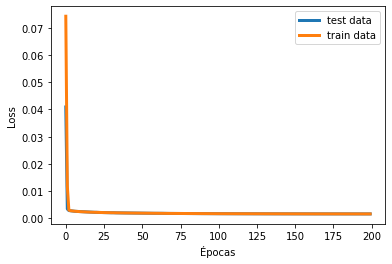

In [9]:
plt.plot(history.history['val_loss'],label='test data',linewidth=3)
plt.plot(history.history['loss'],label='train data',linewidth=3)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
loss_final_ts = history.history['loss'][-1]
loss_final_tr = history.history['val_loss'][-1]
#plt.text(140,400,'loss train final: '+str(round(loss_final_tr,2))+'\n loss test final: '+str(round(loss_final_ts,2)))
plt.savefig('ej5_1.pdf')

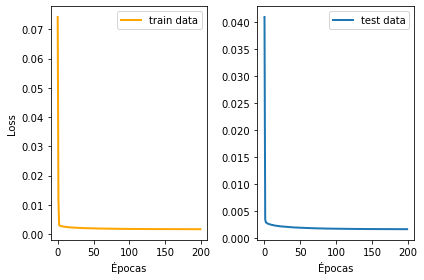

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.plot(history.history['val_loss'],label='test data',linewidth=2)
ax1.set_xlabel('Épocas')
ax2.set_xlabel('Épocas')
ax1.set_ylabel('Loss')
ax2.legend()
ax1.plot(history.history['loss'],label='train data',linewidth=2,c='orange')
ax1.legend()
plt.tight_layout()
fig.savefig('ej5_loss_1.pdf')

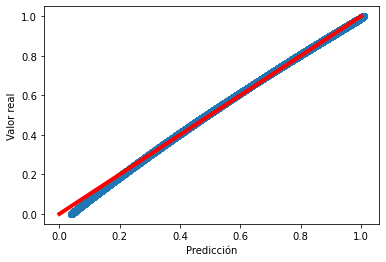

In [8]:
y_pr = model.predict(x_test)
plt.scatter(y_pr,y_test)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
x_aux = np.linspace(min(y_test),max(y_test),100)
plt.plot(x_aux,x_aux,c='r',linewidth=4)
plt.savefig('ej5_2.pdf')